In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [115]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N1 = 20
N2 = 50
N3 = 1000
X0 = np.random.multivariate_normal(means[0], cov, N1)
X1 = np.random.multivariate_normal(means[1], cov, N2)
X2 = np.random.multivariate_normal(means[2], cov, N3)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3
original_label = np.asarray([0]*N1 + [1]*N2 + [2]*N3).T

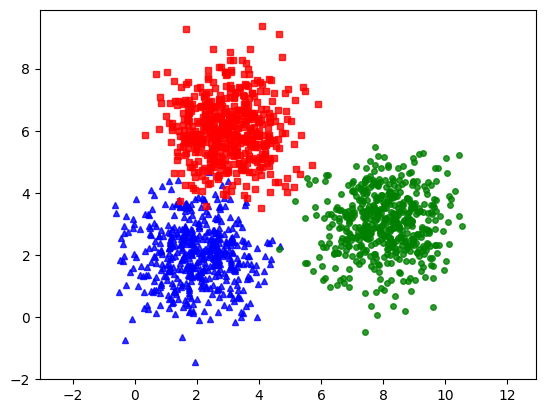

In [35]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

In [86]:
def kmeans_init_centers(X, K):
    # randomly pick k rows of X as initial centers
	return X[np.random.choice(X.shape[0], K, replace=False)]

def kmeans_assign_label(X, centers):
    D = np.zeros((X.shape[0], centers.shape[0]))
    m = X.shape[0]
    point_numb = centers.shape[0]

    for i in range(m):
        for j in range(point_numb):
            distance = np.sum((X[i] - centers[j])**2)
            D[i][j] = distance

    closest_center = np.argmin(D, axis=1)
    return closest_center
    # calculate pairwise distances btw data and centers
    # D = cdist(X, centers)
    # # return index of the closest center
    # return np.argmin(D, axis = 1)

In [97]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        X_k = X[labels == k, :]
        centers[k, :] = np.mean(X_k, axis = 0)

    return centers

In [100]:
def has_converged(centers, new_centers, tolerance=1e-4):
    diff = np.linalg.norm(new_centers - centers)

    if diff < tolerance:
        return True
    else:
        return False

In [98]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_label(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1

    return (centers, labels, it)

In [104]:
(centers, labels, it) = kmeans(X, K)

[array([2, 0, 0, ..., 1, 1, 1], shape=(1500,))]
[array([2, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,))]
[array([2, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,))]
[array([2, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,))]
[array([2, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,))]
[array([2, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,)), array([0, 0, 0, ..., 1, 1, 1], shape=(1500,))]


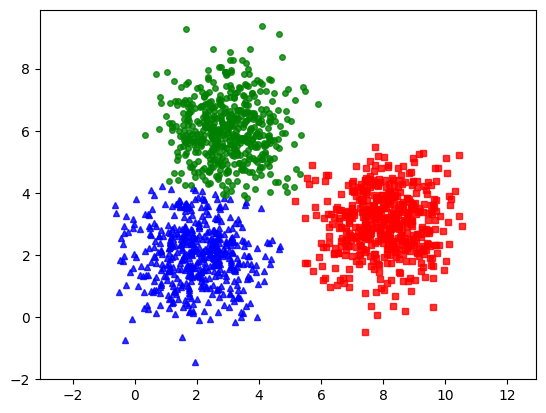

Centers found it by our algorithm:
[[1.9780868  2.0065323 ]
 [2.98431534 6.03500824]
 [8.03643517 3.02468432]]
5


In [109]:
kmeans_display(X, labels[-1])
print('Centers found it by our algorithm:')
print(centers[-1])


Centers found by scikit-learn:
[[3.05412266 4.9697757 ]
 [2.86206348 6.65599528]
 [8.16129539 3.05667254]]


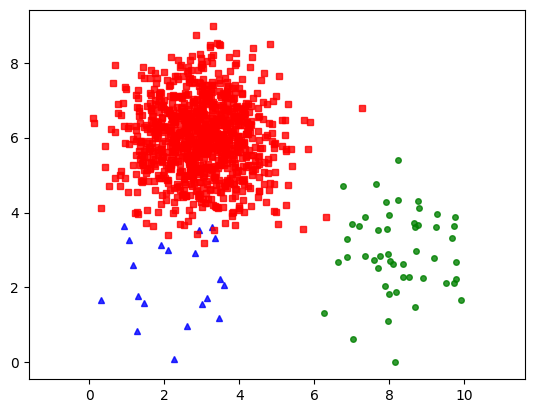

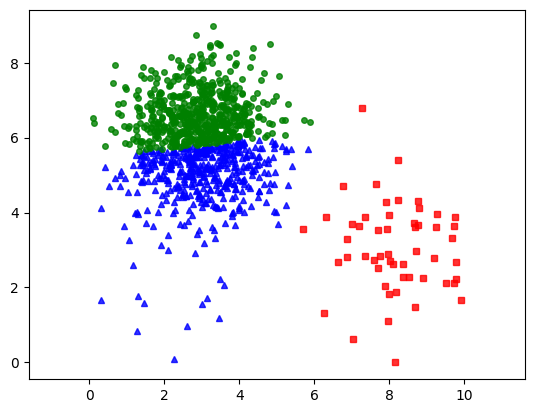

In [117]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, original_label)
kmeans_display(X, pred_label)